<a href="https://colab.research.google.com/github/basilnarakodan/student_grade_prediction/blob/main/MINI_PROJECT_BASIL_NARAKODAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#linear regression
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# deep learning
import matplotlib.pyplot as plt
import os,csv
import zipfile
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import glob, keras
import numpy as np
import pandas as pd
%matplotlib inline
from keras.utils import np_utils
from keras import regularizers
from keras.models import Sequential,load_model
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.layers import Dense, Dropout

# Load Data to Dataframe

In [38]:
data=pd.read_csv('/content/student-mat.csv',delimiter=',')

In [39]:
Student_Math_Data=data[['failures','sex','Medu','Fedu',"Fjob","Mjob",'G1','G2','G3']]

In [6]:
#linear regression
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

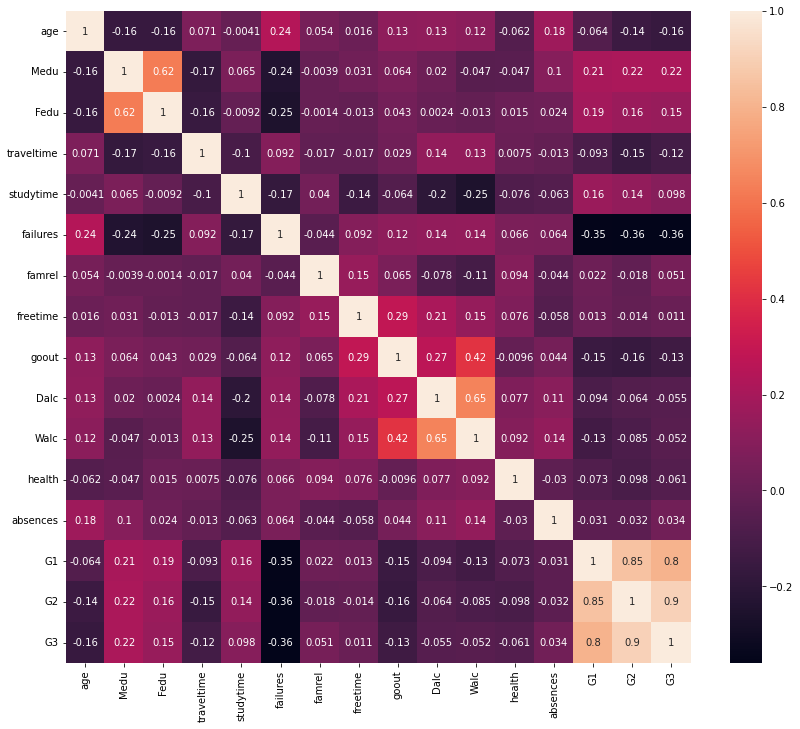

In [7]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [8]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [40]:
df1=data[['failures','sex','Medu','Fedu',"Fjob","Mjob",'G1','G2','G3']]

In [41]:
nonnumeric_columns = [df1.columns[index] for index, dtype in enumerate(df1.dtypes) if dtype == 'object']


In [42]:
df1

,failures,sex,Medu,Fedu,Fjob,Mjob,G1,G2,G3
0,0,F,4,4,teacher,at_home,5,6,6
1,0,F,1,1,other,at_home,5,5,6
2,3,F,1,1,other,at_home,7,8,10
3,0,F,4,2,services,health,15,14,15
4,0,F,3,3,other,other,6,10,10
...,...,...,...,...,...,...,...,...,...
390,2,M,2,2,services,services,9,9,9
391,0,M,3,1,services,services,14,16,16
392,3,M,1,1,other,other,10,8,7
393,0,M,3,2,other,services,11,12,10


In [43]:
df1.dtypes

failures     int64
sex         object
Medu         int64
Fedu         int64
Fjob        object
Mjob        object
G1           int64
G2           int64
G3           int64
dtype: object

In [44]:
nonnumeric_columns = [df1.columns[index] for index, dtype in enumerate(df1.dtypes) if dtype == 'object']


In [45]:
for column in nonnumeric_columns:
    print(f"{column}: {df1[column].unique()}")

sex: ['F' 'M']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']


In [46]:
df1['Mjob'] = df1['Mjob'].apply(lambda x: "m_" + x)
df1['Fjob'] = df1['Fjob'].apply(lambda x: "f_" + x)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,failures,sex,Medu,Fedu,Fjob,Mjob,G1,G2,G3
0,0,F,4,4,f_teacher,m_at_home,5,6,6
1,0,F,1,1,f_other,m_at_home,5,5,6
2,3,F,1,1,f_other,m_at_home,7,8,10
3,0,F,4,2,f_services,m_health,15,14,15
4,0,F,3,3,f_other,m_other,6,10,10
...,...,...,...,...,...,...,...,...,...
390,2,M,2,2,f_services,m_services,9,9,9
391,0,M,3,1,f_services,m_services,14,16,16
392,3,M,1,1,f_other,m_other,10,8,7
393,0,M,3,2,f_other,m_services,11,12,10


In [47]:
dummies = pd.concat([pd.get_dummies(df1['Mjob']),
                     pd.get_dummies(df1['Fjob'])],
                     axis=1)
dummies

,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher
0,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
390,0,0,0,1,0,0,0,0,1,0
391,0,0,0,1,0,0,0,0,1,0
392,0,0,1,0,0,0,0,1,0,0
393,0,0,0,1,0,0,0,1,0,0


In [48]:
df1 = pd.concat([df1, dummies], axis=1)

df1.drop(['Mjob', 'Fjob'], axis=1, inplace=True)

In [49]:
nonnumeric_columns = [df1.columns[index] for index, dtype in enumerate(df1.dtypes) if dtype == 'object']


In [50]:
encoder = LabelEncoder()

for column in nonnumeric_columns:
    df1[column] = encoder.fit_transform(df1[column])

In [51]:
y = df1['G3']
X = df1.drop('G3', axis=1)

In [52]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [54]:
reg=LinearRegression()
#reg.fit(x,y)
#print(reg.score(x,y))
reg.fit(X_train,y_train)
print(reg.score(X_test,y_test)*100)

82.64392755268331


In [55]:
pred=reg.predict(X_test)
pred

array([17.72936712, 12.79321893,  9.02823181, 12.62077479,  0.51212185,
        7.47307318, 13.18579523,  9.55387959, 10.99342517, 12.14025872,
       13.03577898, 15.84462876, 19.06035037, 18.56508404, 11.78290199,
        6.31630633, 11.98428389,  8.87999497,  6.32812554,  7.39602872,
       10.57631339, 12.20110677,  8.2731603 ,  9.38142528, 13.84289254,
       15.79149788, 12.42398557,  9.47994176,  5.65898054,  4.10910057,
       14.38561187,  3.90785432, 14.61830905, 12.40965818, 13.71664205,
        7.68702958,  6.80128442, 11.23251199, 13.7857291 , 15.58340879,
       19.07341931,  9.37741382, 13.80496413, 13.11505667, 16.2904777 ,
       12.32441242,  7.41020358, 15.12407096,  8.3242107 , 15.15245174,
        6.63491871,  9.84361388,  7.31898425,  9.74879361, 11.33971784,
        8.4639319 ,  7.21943198,  7.19324008, 12.81153222,  4.08569729,
        5.57134941, 13.201544  ,  6.44185267,  8.97039647,  6.01919254,
        9.86227288, 11.89312578, 12.10515945, 12.83045325,  6.12

In [56]:
predd=np.array([0,1,3,2,12,13,0,0,0,0,1,0,0,0,0,1]).reshape(1,-1)
reg.predict(predd)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([64.41087192])

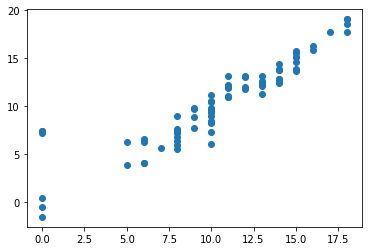

In [57]:
plt.scatter(y_test,pred)

In [58]:
#perceptron
from sklearn.linear_model import Perceptron
import pandas as pd
ml=Perceptron()


In [28]:
# #As instructed in the paper, convert G3 to 5 grade classes A,B,C,D,F
# grade = []
# for i in Student_Math_Data['G3'].values:
#     if i in range(0,10):
#         grade.append('F')
#     elif i in range(10,12):
#         grade.append('D')
#     elif i in range(12,14):
#         grade.append('C')
#     elif i in range(14,16):
#         grade.append('B')
#     else:
#         grade.append("A")

# Student_Math_Data_Copy = Student_Math_Data
# se = pd.Series(grade)
# Student_Math_Data_Copy['Grade'] = se.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [29]:
# data=pd.read_csv('/content/student-mat.csv',delimiter=',')
# Student_Math_Data=data[['failures','sex','Medu','Fedu',"Fjob","Mjob",'G1','G2','G3']]

In [30]:
# student_Math_Data_without_G3 =  Student_Math_Data_Copy.drop(['G3'], axis=1)

In [31]:
# #Create data frames for input and output variables
# Y = student_Math_Data_without_G3.filter(["Grade"],axis=1)
# X = student_Math_Data_without_G3.drop(['Grade'],axis=1)
# #split the datasets into train and test
# xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.15)

In [34]:
# #Perform one hot encoding
# x_train = pd.get_dummies(xTrain)
# x_test = pd.get_dummies(xTest)
# y_train  = pd.get_dummies(yTrain)
# y_test  = pd.get_dummies(yTest)

In [60]:
ml.fit(X_train, y_train)

Perceptron()

In [61]:
print(f"Model R2: {ml.score(X_test, y_test)}")

Model R2: 0.17721518987341772


In [62]:
#svm
from sklearn.svm import SVC 


In [63]:
ml=SVC()

In [64]:
ml.fit(X_train, y_train)

SVC()

In [65]:
print(f"Model R2: {ml.score(X_test, y_test)}")

Model R2: 0.16455696202531644


In [66]:
#deep learning
data=pd.read_csv('/content/student-mat.csv',delimiter=',')
Student_Math_Data=data[['failures','sex','Medu','Fedu',"Fjob","Mjob",'G1','G2','G3']]

# Data Analysis

In [67]:
Student_Math_Data.head(10)

,failures,sex,Medu,Fedu,Fjob,Mjob,G1,G2,G3
0,0,F,4,4,teacher,at_home,5,6,6
1,0,F,1,1,other,at_home,5,5,6
2,3,F,1,1,other,at_home,7,8,10
3,0,F,4,2,services,health,15,14,15
4,0,F,3,3,other,other,6,10,10
5,0,M,4,3,other,services,15,15,15
6,0,M,2,2,other,other,12,12,11
7,0,F,4,4,teacher,other,6,5,6
8,0,M,3,2,other,services,16,18,19
9,0,M,3,4,other,other,14,15,15


In [68]:
Student_Math_Data.describe()

,failures,Medu,Fedu,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.334177,2.749367,2.521519,10.908861,10.713924,10.415190
std,0.743651,1.094735,1.088201,3.319195,3.761505,4.581443
min,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,8.000000,9.000000,8.000000
50%,0.000000,3.000000,2.000000,11.000000,11.000000,11.000000
75%,0.000000,4.000000,3.000000,13.000000,13.000000,14.000000
max,3.000000,4.000000,4.000000,19.000000,19.000000,20.000000


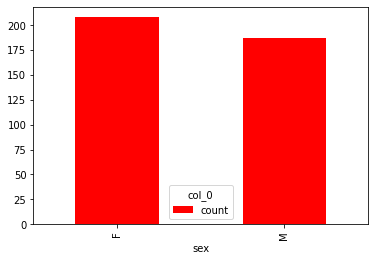

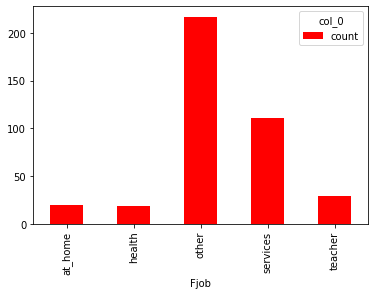

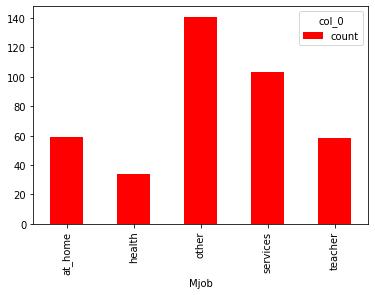

In [69]:
#Bar Plots for categorical Variables
my_colors = ['r','g','y','b']
for i in Student_Math_Data.select_dtypes(['object']).columns:
    my_tab = pd.crosstab(index = Student_Math_Data[i], columns="count")     
    my_tab.plot.bar(color=my_colors)

In [70]:
#Calculate the correlation in order to know which variables are most related
correlation = Student_Math_Data.corr()
correlation_sorted = correlation.abs().unstack()
correlation_sorted.sort_values(ascending = False)

failures  failures    1.000000
Medu      Medu        1.000000
G2        G2          1.000000
G1        G1          1.000000
Fedu      Fedu        1.000000
G3        G3          1.000000
          G2          0.904868
G2        G3          0.904868
          G1          0.852118
G1        G2          0.852118
G3        G1          0.801468
G1        G3          0.801468
Medu      Fedu        0.623455
Fedu      Medu        0.623455
failures  G3          0.360415
G3        failures    0.360415
failures  G2          0.355896
G2        failures    0.355896
failures  G1          0.354718
G1        failures    0.354718
failures  Fedu        0.250408
Fedu      failures    0.250408
failures  Medu        0.236680
Medu      failures    0.236680
          G3          0.217147
G3        Medu        0.217147
G2        Medu        0.215527
Medu      G2          0.215527
G1        Medu        0.205341
Medu      G1          0.205341
G1        Fedu        0.190270
Fedu      G1          0.190270
        

In [71]:
#As instructed in the paper, convert G3 to 5 grade classes A,B,C,D,F
grade = []
for i in Student_Math_Data['G3'].values:
    if i in range(0,10):
        grade.append('F')
    elif i in range(10,12):
        grade.append('D')
    elif i in range(12,14):
        grade.append('C')
    elif i in range(14,16):
        grade.append('B')
    else:
        grade.append("A")

Student_Math_Data_Copy = Student_Math_Data
se = pd.Series(grade)
Student_Math_Data_Copy['Grade'] = se.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [72]:
#Verfify if the mapping is correct
Student_Math_Data_Copy.head(2)


,failures,sex,Medu,Fedu,Fjob,Mjob,G1,G2,G3,Grade
0,0,F,4,4,teacher,at_home,5,6,6,F
1,0,F,1,1,other,at_home,5,5,6,F


# DataCleaning

In [73]:
# check for any non unique columns
Student_Math_Data_Copy.apply(pd.Series.nunique)

failures     4
sex          2
Medu         5
Fedu         5
Fjob         5
Mjob         5
G1          17
G2          17
G3          18
Grade        5
dtype: int64

In [74]:
#Check if any columns has NaN's
Student_Math_Data.isnull().sum()

failures    0
sex         0
Medu        0
Fedu        0
Fjob        0
Mjob        0
G1          0
G2          0
G3          0
Grade       0
dtype: int64

In [75]:
#Now drop G3 column
student_Math_Data_without_G3 =  Student_Math_Data_Copy.drop(['G3'], axis=1)

In [76]:
#Create data frames for input and output variables
Y = student_Math_Data_without_G3.filter(["Grade"],axis=1)
X = student_Math_Data_without_G3.drop(['Grade'],axis=1)
#split the datasets into train and test
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.15)

In [77]:
#Perform one hot encoding
x_train = pd.get_dummies(xTrain)
x_test = pd.get_dummies(xTest)
y_train  = pd.get_dummies(yTrain)
y_test  = pd.get_dummies(yTest)

In [78]:
x_train

,failures,Medu,Fedu,G1,G2,sex_F,sex_M,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
80,0,2,3,10,12,0,1,0,0,0,1,0,0,0,1,0,0
223,0,2,2,12,13,0,1,0,0,1,0,0,0,0,1,0,0
393,0,3,2,11,12,0,1,0,0,1,0,0,0,0,0,1,0
34,0,3,2,12,14,0,1,0,0,1,0,0,0,0,1,0,0
189,0,1,2,8,9,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,3,1,7,7,1,0,0,0,1,0,0,0,0,0,1,0
355,0,3,3,10,9,1,0,0,0,0,1,0,0,0,0,1,0
193,0,3,3,8,9,0,1,0,0,0,1,0,0,0,0,1,0
9,0,3,4,14,15,0,1,0,0,1,0,0,0,0,1,0,0


In [79]:
# #linear regression
# from sklearn.linear_model import LinearRegression
# reg=LinearRegression()
# #reg.fit(x,y)
# #print(reg.score(x,y))
# reg.fit(x_train,y_train)
# print(reg.score(x_test,y_test)*100)

18.05876478459431


# MultiClass Classification

In [80]:
#After multiple attempts, I was able to achieve best model with below configuration.
model = Sequential()
model.add(Dense(64, activation='relu',  kernel_regularizer=regularizers.l2(0.001),input_shape = (17,)))
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(5,  kernel_regularizer=regularizers.l2(0.001),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history  = model.fit(x_train,y_train, epochs = 200, batch_size = 5, validation_data = (x_test,y_test))
model.save('UCI_model_A.h5')


Epoch 1/200
67/67 [==============================] - 1s 7ms/step - loss: 1.7682 - accuracy: 0.3403 - val_loss: 1.4904 - val_accuracy: 0.4667
Epoch 2/200
67/67 [==============================] - 0s 3ms/step - loss: 1.4511 - accuracy: 0.4179 - val_loss: 1.2732 - val_accuracy: 0.5167
Epoch 3/200
67/67 [==============================] - 0s 3ms/step - loss: 1.3121 - accuracy: 0.4627 - val_loss: 1.1785 - val_accuracy: 0.5833
Epoch 4/200
67/67 [==============================] - 0s 3ms/step - loss: 1.1704 - accuracy: 0.4955 - val_loss: 1.0769 - val_accuracy: 0.5500
Epoch 5/200
67/67 [==============================] - 0s 3ms/step - loss: 1.0930 - accuracy: 0.5612 - val_loss: 1.0187 - val_accuracy: 0.6500
Epoch 6/200
67/67 [==============================] - 0s 3ms/step - loss: 1.0166 - accuracy: 0.5881 - val_loss: 0.9761 - val_accuracy: 0.6333
Epoch 7/200
67/67 [==============================] - 0s 3ms/step - loss: 0.9730 - accuracy: 0.6000 - val_loss: 0.9908 - val_accuracy: 0.6333
Epoch 8/200
6

In [81]:
#Load the saved model and predict the accuracy
model_1 = load_model('UCI_model_A.h5')
model_1.summary()
results = model_1.evaluate(x_test,y_test)
print("Accuracy of the Model %.2f%%" % ( results[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 7,557
Trainable params: 7,557
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 9ms/step - loss: 1.4866 - accuracy: 0.6667
Accuracy of the Model 66.67%


In [82]:
x_test

,failures,Medu,Fedu,G1,G2,sex_F,sex_M,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
361,1,1,1,13,12,0,1,0,0,1,0,0,1,0,0,0,0
178,0,4,2,10,8,0,1,0,0,0,1,0,0,0,0,0,1
247,3,3,1,6,8,0,1,0,0,0,1,0,0,0,0,1,0
76,0,4,0,11,11,0,1,0,0,1,0,0,0,0,0,0,1
283,0,1,1,8,9,1,0,0,0,1,0,0,0,0,1,0,0
175,0,4,3,10,9,0,1,0,0,1,0,0,0,0,0,0,1
7,0,4,4,6,5,1,0,0,0,0,0,1,0,0,1,0,0
261,0,4,3,8,8,0,1,0,0,1,0,0,0,0,0,0,1
254,0,2,1,8,12,0,1,0,0,1,0,0,0,0,1,0,0
234,0,1,1,9,7,0,1,0,0,1,0,0,0,0,1,0,0


In [83]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
#Code for visualizing confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [84]:
#Predict Y values
y_predicted = model_1.predict(x_test)

#Convert y_test dataframe to letter grades
test_Y = []
for i in y_test.values:
    if i[4].round() ==1:
        test_Y.append('F')
    elif i[3].round() ==1:
        test_Y.append('D')
    elif i[2].round() == 1:
        test_Y.append('C')
    elif i[1].round() ==1:
        test_Y.append('B')
    elif i[0].round() ==1:
        test_Y.append('A')
 
#convert y_predicted dataframe to letter grades
predicted_Y1 = []

for i in y_predicted:
    if i[4].round() == 1:
        predicted_Y1.append('F')
    elif i[3].round() ==1:
        predicted_Y1.append('D')
    elif i[2].round() == 1:
        predicted_Y1.append('C')
    elif i[1].round() ==1:
        predicted_Y1.append('B')
    else:
        predicted_Y1.append('A')


2/2 [==============================] - 0s 6ms/step


Confusion matrix
[[ 0  4  0  0  0]
 [ 0  4  2  0  0]
 [ 0  2  5  2  0]
 [ 0  1  2 11  1]
 [ 0  0  0  6 20]]


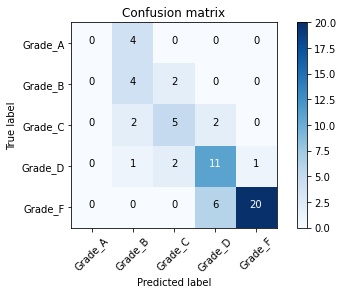

In [85]:
names = ["Grade_A", "Grade_B", "Grade_C","Grade_D","Grade_F"]
cm = confusion_matrix(test_Y, predicted_Y1,labels=["A", "B", "C","D","F"])
plt.figure()
plot_confusion_matrix(cm, classes=names, title='Confusion matrix')

In [86]:
history

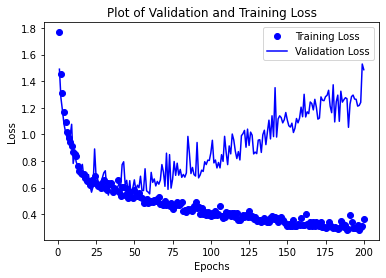

In [87]:
#Plot training loss and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs  = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.title('Plot of Validation and Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



# Checking if dropping G2 has impact on Performance of Student

In [88]:
#Drop G2 to build model for Architecture B given in the Paper
student_Math_Data_without_G2 =  student_Math_Data_without_G3.drop(['G2'], axis=1)

In [89]:
#Generate input and output dataframes
Y_G2 = student_Math_Data_without_G2.filter(["Grade"],axis=1)
X_G2 = student_Math_Data_without_G2.drop(['Grade'],axis=1)

#Split the dataframes to train and test
xTrain_G2, xTest_G2, yTrain_G2, yTest_G2 = train_test_split(X_G2, Y_G2, test_size=0.15)

In [90]:
#Perform one hot encoding of categorical variables
x_train_G2 = pd.get_dummies(xTrain_G2)
x_test_G2 = pd.get_dummies(xTest_G2)
y_train_G2  = pd.get_dummies(yTrain_G2)
y_test_G2  = pd.get_dummies(yTest_G2)

In [91]:
#After multiple attempts, I was able to achieve best model with below configuration.
#I have created a model with 1 input, 2 hidden and one output layer
model_G2 = Sequential()
model_G2.add(Dense(64, activation='relu',  kernel_regularizer=regularizers.l2(0.001),input_shape = (16,)))
model_G2.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_G2.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_G2.add(Dense(5,  kernel_regularizer=regularizers.l2(0.001),activation='softmax'))
model_G2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_G2  = model_G2.fit(x_train_G2,y_train_G2, epochs = 200, batch_size = 5, validation_data = (x_test_G2,y_test_G2))
model_G2.save('UCI_model_B.h5')

Epoch 1/200
67/67 [==============================] - 1s 6ms/step - loss: 1.7040 - accuracy: 0.3075 - val_loss: 1.6636 - val_accuracy: 0.4500
Epoch 2/200
67/67 [==============================] - 0s 3ms/step - loss: 1.5915 - accuracy: 0.3761 - val_loss: 1.5263 - val_accuracy: 0.4000
Epoch 3/200
67/67 [==============================] - 0s 3ms/step - loss: 1.4002 - accuracy: 0.4448 - val_loss: 1.3730 - val_accuracy: 0.4167
Epoch 4/200
67/67 [==============================] - 0s 3ms/step - loss: 1.2480 - accuracy: 0.4955 - val_loss: 1.2257 - val_accuracy: 0.6000
Epoch 5/200
67/67 [==============================] - 0s 3ms/step - loss: 1.1784 - accuracy: 0.5224 - val_loss: 1.1747 - val_accuracy: 0.6000
Epoch 6/200
67/67 [==============================] - 0s 3ms/step - loss: 1.1161 - accuracy: 0.5493 - val_loss: 1.1497 - val_accuracy: 0.4500
Epoch 7/200
67/67 [==============================] - 0s 3ms/step - loss: 1.0867 - accuracy: 0.5343 - val_loss: 1.1264 - val_accuracy: 0.4500
Epoch 8/200
6

In [92]:
model_2 = load_model('UCI_model_B.h5')
model_2.summary()
results = model_2.evaluate(x_test_G2,y_test_G2)
print("Accuracy of the Model %.2f%%" % ( results[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1088      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 7,493
Trainable params: 7,493
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 5ms/step - loss: 2.2611 - accuracy: 0.5167
Accuracy of the Model 51.67%


In [93]:
#Predict Y values
y_predicted_G2 = model_2.predict(x_test_G2)

#Convert y_test dataframe to letter grades
test_Y_G2 = []
for i in y_test_G2.values:
    if i[4].round() ==1:
        test_Y_G2.append('F')
    elif i[3].round() ==1:
        test_Y_G2.append('D')
    elif i[2].round() == 1:
        test_Y_G2.append('C')
    elif i[1].round() ==1:
        test_Y_G2.append('B')
    elif i[0].round() ==1:
        test_Y_G2.append('A')
 
#convert y_predicted dataframe to letter grades
predicted_Y_G2 = []
for i in y_predicted_G2:
    if i[4].round() ==1:
        predicted_Y_G2.append('F')
    elif i[3].round() ==1:
        predicted_Y_G2.append('D')
    elif i[2].round() == 1:
        predicted_Y_G2.append('C')
    elif i[1].round() ==1:
        predicted_Y_G2.append('B')
    else:
        predicted_Y_G2.append('A')



2/2 [==============================] - 0s 6ms/step


Confusion matrix
[[ 5  2  0  0  0]
 [ 4  2  2  3  0]
 [ 1  0  2  5  2]
 [ 1  1  1  7  2]
 [ 1  0  0  5 14]]


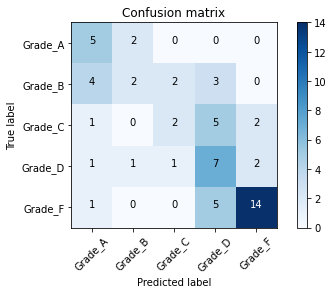

In [94]:
#Generate Confusion Matrix and plot the same
names = ["Grade_A", "Grade_B", "Grade_C","Grade_D","Grade_F"]
cm_G2 = confusion_matrix(test_Y_G2, predicted_Y_G2,labels=["A", "B", "C","D","F"])
plt.figure()
plot_confusion_matrix(cm_G2, classes=names, title='Confusion matrix')

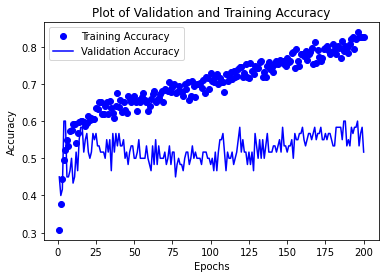

In [95]:
#Plot training accuracy and validation accuracy
acc_G2 = history_G2.history['accuracy']
val_acc_G2 = history_G2.history['val_accuracy']
plt.plot(epochs,acc_G2,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc_G2,'b',label = 'Validation Accuracy')
plt.title('Plot of Validation and Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

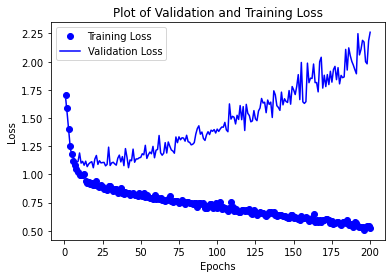

In [96]:
#Plot training loss and validation loss
loss_G2 = history_G2.history['loss']
val_loss_G2 = history_G2.history['val_loss']
epochs  = range(1,len(loss)+1)
plt.plot(epochs,loss_G2,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss_G2,'b',label = 'Validation Loss')
plt.title('Plot of Validation and Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



# Checking if dropping G1 and G2 has impact on Performance of Student

In [97]:
#Drop G1 to build model for Architecture C given in the Paper
student_Math_Data_without_G1 =  student_Math_Data_without_G2.drop(['G1'], axis=1)

In [98]:
#create input and output data frames
Y_G1 = student_Math_Data_without_G1.filter(["Grade"],axis=1)
X_G1 = student_Math_Data_without_G1.drop(['Grade'],axis=1)

#split the dataset into train and test
xTrain_G1, xTest_G1, yTrain_G1, yTest_G1 = train_test_split(X_G1, Y_G1, test_size=0.15)

In [99]:
#Perform one hot encoding of categorical variables
x_train_G1 = pd.get_dummies(xTrain_G1)
x_test_G1 = pd.get_dummies(xTest_G1)
y_train_G1  = pd.get_dummies(yTrain_G1)
y_test_G1 = pd.get_dummies(yTest_G1)

In [100]:

model_G1 = Sequential()
model_G1.add(Dense(64, activation='relu',  kernel_regularizer=regularizers.l2(0.001),input_shape = (15,)))
model_G1.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_G1.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_G1.add(Dense(5,  kernel_regularizer=regularizers.l2(0.001),activation='softmax'))
model_G1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_G1  = model_G1.fit(x_train_G1,y_train_G1, epochs = 200, batch_size = 5, validation_data = (x_test_G1,y_test_G1))
model_G1.save('UCI_model_C.h5')

Epoch 1/200
67/67 [==============================] - 3s 18ms/step - loss: 1.6878 - accuracy: 0.2896 - val_loss: 1.6498 - val_accuracy: 0.3167
Epoch 2/200
67/67 [==============================] - 1s 8ms/step - loss: 1.5896 - accuracy: 0.3373 - val_loss: 1.5864 - val_accuracy: 0.3333
Epoch 3/200
67/67 [==============================] - 1s 10ms/step - loss: 1.5408 - accuracy: 0.3403 - val_loss: 1.5552 - val_accuracy: 0.3000
Epoch 4/200
67/67 [==============================] - 1s 10ms/step - loss: 1.5139 - accuracy: 0.3582 - val_loss: 1.5326 - val_accuracy: 0.3167
Epoch 5/200
67/67 [==============================] - 0s 4ms/step - loss: 1.4991 - accuracy: 0.3612 - val_loss: 1.5173 - val_accuracy: 0.3000
Epoch 6/200
67/67 [==============================] - 0s 3ms/step - loss: 1.4805 - accuracy: 0.3851 - val_loss: 1.5186 - val_accuracy: 0.2500
Epoch 7/200
67/67 [==============================] - 0s 3ms/step - loss: 1.4766 - accuracy: 0.3821 - val_loss: 1.5015 - val_accuracy: 0.3167
Epoch 8/20

In [101]:
model_3 = load_model('UCI_model_C.h5')
model_3.summary()
results = model_3.evaluate(x_test_G1,y_test_G1)
print("Accuracy of the Model %.2f%%" % ( results[1]*100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1024      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 5)                 165       
                                                                 
Total params: 7,429
Trainable params: 7,429
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 1s 6ms/step - loss: 3.0721 - accuracy: 0.2667
Accuracy of the Model 26.67%


In [102]:
#Predict Y values
y_predicted_G1 = model_3.predict(x_test_G1)

#Convert y_test dataframe to letter grades
test_Y_G1 = []
for i in y_test_G1.values:
    if i[4].round() ==1:
        test_Y_G1.append('F')
    elif i[3].round() ==1:
        test_Y_G1.append('D')
    elif i[2].round() == 1:
        test_Y_G1.append('C')
    elif i[1].round() ==1:
        test_Y_G1.append('B')
    elif i[0].round() ==1:
        test_Y_G1.append('A')
 
#convert y_predicted dataframe to letter grades
predicted_Y_G1 = []
for i in y_predicted_G1:
    if i[4].round() ==1:
        predicted_Y_G1.append('F')
    elif i[3].round() ==1:
        predicted_Y_G1.append('D')
    elif i[2].round() == 1:
        predicted_Y_G1.append('C')
    elif i[1].round() ==1:
        predicted_Y_G1.append('B')
    else:
        predicted_Y_G1.append('A')



2/2 [==============================] - 0s 6ms/step


Confusion matrix
[[3 2 0 0 1]
 [4 3 2 1 1]
 [4 0 1 4 1]
 [5 0 3 3 3]
 [6 2 2 5 4]]


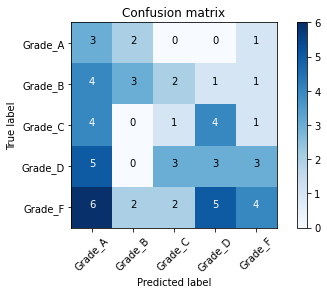

In [103]:
#Generate Confusion Matrix and plot the same
names = ["Grade_A", "Grade_B", "Grade_C","Grade_D","Grade_F"]
cm_G1 = confusion_matrix(test_Y_G1, predicted_Y_G1,labels=["A", "B", "C","D","F"])
plt.figure()
plot_confusion_matrix(cm_G1, classes=names, title='Confusion matrix')

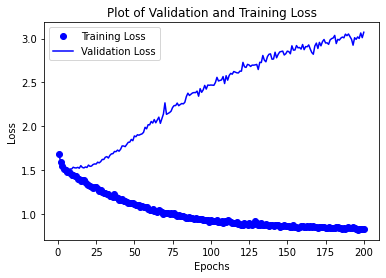

In [104]:
#Plot training loss and validation loss
loss_G1 = history_G1.history['loss']
val_loss_G1 = history_G1.history['val_loss']
epochs  = range(1,len(loss_G1)+1)
plt.plot(epochs,loss_G1,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss_G1,'b',label = 'Validation Loss')
plt.title('Plot of Validation and Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



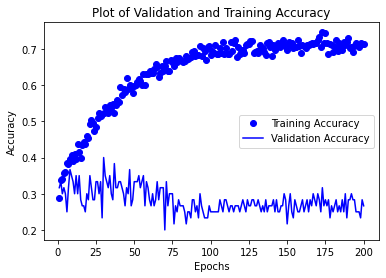

In [105]:
#Plot training accuracy and validation accuracy
acc_G1 = history_G1.history['accuracy']
val_acc_G1 = history_G1.history['val_accuracy']
plt.plot(epochs,acc_G1,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc_G1,'b',label = 'Validation Accuracy')
plt.title('Plot of Validation and Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [106]:
history_G1.history['accuracy']

[0.289552241563797,
 0.3373134434223175,
 0.34029850363731384,
 0.35820895433425903,
 0.36119404435157776,
 0.3850746154785156,
 0.3820895552635193,
 0.39701491594314575,
 0.40597015619277954,
 0.3910447657108307,
 0.4089552164077759,
 0.39701491594314575,
 0.4388059675693512,
 0.41492536664009094,
 0.4000000059604645,
 0.43582090735435486,
 0.4417910575866699,
 0.4388059675693512,
 0.4597014784812927,
 0.45373135805130005,
 0.49253731966018677,
 0.5044776201248169,
 0.4955223798751831,
 0.4746268689632416,
 0.483582079410553,
 0.5104477405548096,
 0.5223880410194397,
 0.5134328603744507,
 0.5194029808044434,
 0.5223880410194397,
 0.5402985215187073,
 0.5283582210540771,
 0.5223880410194397,
 0.5462686419487,
 0.5373134613037109,
 0.5492537021636963,
 0.5223880410194397,
 0.5462686419487,
 0.5582089424133301,
 0.5522388219833374,
 0.5940298438072205,
 0.5731343030929565,
 0.5880597233772278,
 0.5820895433425903,
 0.620895504951477,
 0.5880597233772278,
 0.6000000238418579,
 0.591044783